In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = df.iloc[:,2:4]
y = df.iloc[:,4]

In [5]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
y.shape

(400,)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

In [12]:
X_test = scaler.transform(X_test)
X_test

array([[-0.84826272,  0.40218125],
       [-1.62050759, -1.57325199],
       [-0.07601785, -0.48234109],
       [-0.84826272,  0.16630863],
       [ 1.56500249,  0.01888824],
       [ 0.88928823, -1.45531567],
       [-1.42744637,  0.37269718],
       [-0.94479333, -1.10150673],
       [ 0.21357397, -0.27595254],
       [-0.17254846,  1.66999662],
       [-1.33091576, -1.36686344],
       [-1.52397698, -1.24892713],
       [-0.5586709 ,  1.40463991],
       [ 0.69622701,  0.28424494],
       [-0.26907907, -0.30543662],
       [-0.46214029, -0.77718187],
       [-1.8135688 ,  0.01888824],
       [ 2.14418614, -0.80666595],
       [ 1.46847188,  0.07785639],
       [-1.13785454, -0.77718187],
       [-0.07601785,  0.25476086],
       [ 0.69622701, -0.71821372],
       [-0.75173211, -0.21698439],
       [-0.17254846, -1.07202266],
       [-1.23438515,  0.31372902],
       [ 0.69622701, -1.10150673],
       [ 0.69622701, -1.39634752],
       [ 0.21357397, -0.36440478],
       [ 0.5996964 ,

In [14]:
k = int(np.sqrt(X_train.shape[0]))
k

17

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [16]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9125

In [19]:
accuracy = []

for i in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

accuracy


[0.8875,
 0.8625,
 0.925,
 0.8625,
 0.8875,
 0.875,
 0.9,
 0.875,
 0.9125,
 0.8875,
 0.9,
 0.9,
 0.9125,
 0.9,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.925,
 0.925,
 0.9375,
 0.9125,
 0.9125,
 0.9,
 0.9125]

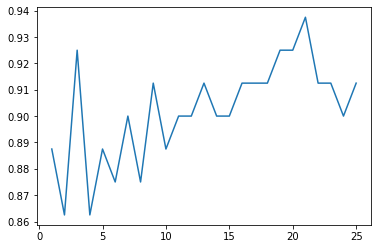

In [20]:
plt.plot(range(1,26),accuracy)

In [29]:
def predict_output():
    age = int(input("Enter the age: "))
    salary = int(input("Enter the salary: "))
    X_new = np.array([[age], [salary]]).reshape(1,2) 
    X_new = scaler.transform(X_new)

    if(knn.predict(X_new)[0] == 0):
        return "Won't Purchase"
    else:
        return "Will Purchase"
    

In [30]:
predict_output()

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


"Won't Purchase"